In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.read_edgelist('facebook_combined.txt')

Enter the starting node:- 2
Enter the ending node:- 1200


['2', '0', '1', '48', '30', '9', '3', '25', '21', '13', '26', '40', '29', '16', '82', '56', '55', '67', '10', '142', '31', '7', '22', '87', '5', '122', '45', '104', '98', '59', '118', '65', '203', '50', '109', '119', '27', '54', '53', '24', '57', '80', '88', '73', '126', '260', '160', '170', '62', '96', '133', '141', '38', '117', '77', '231', '106', '169', '103', '136', '120', '247', '277', '39', '69', '105', '148', '113', '66', '134', '132', '72', '165', '121', '206', '178', '186', '123', '200', '75', '85', '156', '188', '79', '185', '271', '63', '261', '172', '128', '150', '64', '100', '163', '173', '34', '348', '107', '58', '171', '189', '217', '324', '199', '161', '213', '130', '191', '204', '92', '94', '101', '180', '187', '194', '196', '249', '242', '158', '60', '239', '176', '290', '280', '153', '232', '212', '252', '223', '211', '222', '238', '265', '84', '51', '23', '61', '193', '8', '91', '110', '259', '201', '245', '264', '83', '237', '99', '68', '143', '35', '46', '175', '1

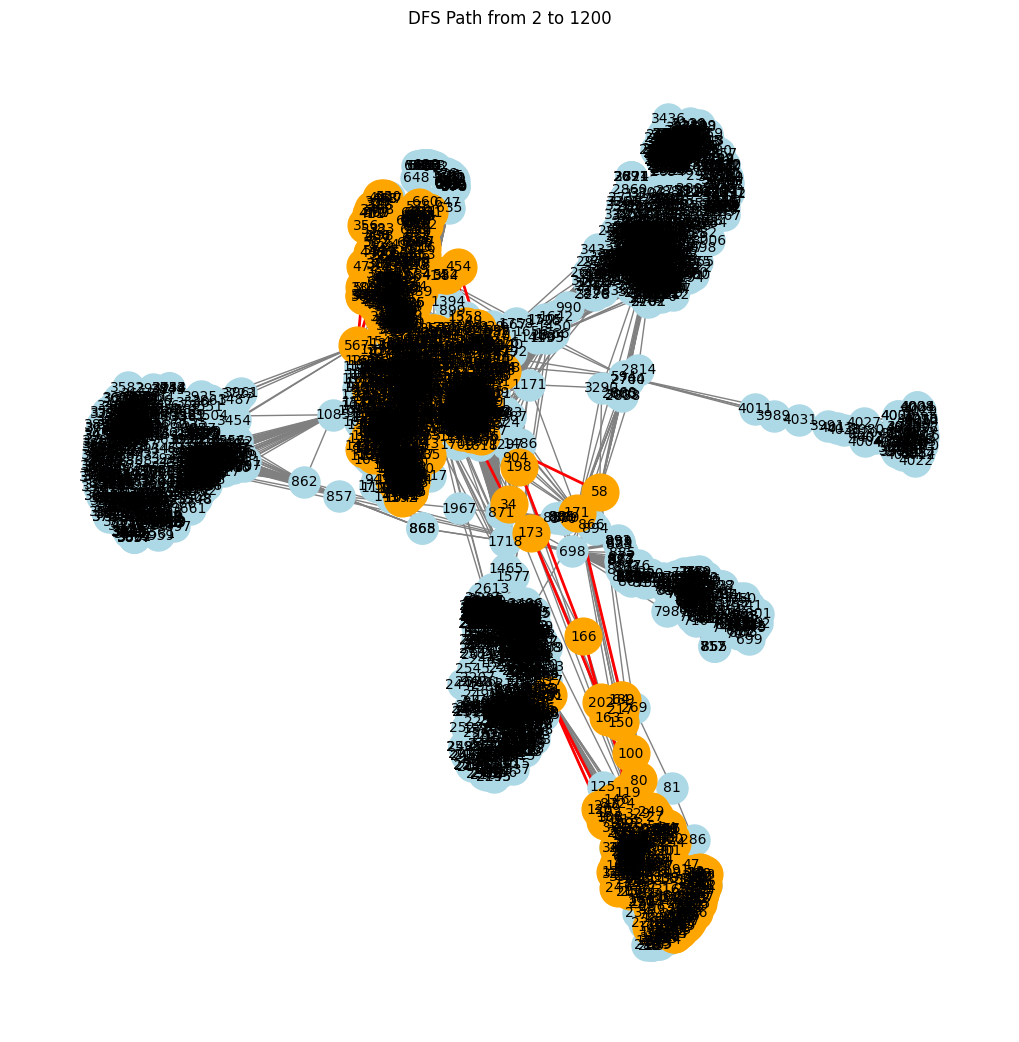

In [2]:
import time

def dfs_recursive(graph, node, end, visited):
    visited.append(node)
    
    if node == end:
        return visited
    
    for neighbor in graph[node]:
        if neighbor not in visited:
            path = dfs_recursive(graph, neighbor, end, visited)
            if path is not None:
                return path

    return None

def dfs(graph, start, end):
    visited = []
    return dfs_recursive(graph, start, end, visited)

x = input('Enter the starting node:-')
y = input('Enter the ending node:-')

if x not in G or y not in G:
    raise ValueError ("Start or goal node not in graph")

st = time.time()
d = dfs(G,x,y)
et = time.time()

print(d)
print("Time taken: {:.6f} seconds".format(et - st))

#Printing the path

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G) 


nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)


if d:
    path_edges = list(zip(d, d[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=d, node_color='orange', node_size=700)

plt.title(f"DFS Path from {x} to {y}")
plt.show()
